# NUS FinTech Case Study on Tesla Stock Prices

---

Use the following link to access the Tesla (TSLA) stock price dataset we have prepared: https://drive.google.com/file/d/1BkPeHzM179zSEUar5G0b_5vpeDXy-AMq/view?usp=sharing

Your python script / notebook should be able to answer the following questions:
1. Plot time series of TSLA
2. Find the minimum and standard deviation of closing price rounded to 3dp
3. Create a Boolean column 'Signal' that indicates whether the price increased from the previous day. How many trading days had positive signals?
4. Assume a naive model that predicts a positive signal on every odd date and a negative signal on every even date i.e. 21 July => odd => positive. Create a Boolean column 'Naive' to represent these predictions
5. Calculate accuracy of the naive model mentioned above.

---

## Imports Required Dependencies
Pandas and Numpy for Excel file reading and data analysis while Matplotlib for chart plotting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("tesla.xlsx")

In [3]:
df

,Date,Close
0,2019-06-03 16:00:00.288,35.79
1,2019-06-04 16:00:00.288,38.72
2,2019-06-05 16:00:00.288,39.32
3,2019-06-06 16:00:00.288,41.19
4,2019-06-07 16:00:00.288,40.90
...,...,...
246,2020-05-22 16:00:00.288,163.38
247,2020-05-26 16:00:00.288,163.77
248,2020-05-27 16:00:00.288,164.05
249,2020-05-28 16:00:00.288,161.16


## Qn 1: Plotting TSLA's Time Series Chart
Simple line chart using Matplotlib with Date and Close as the x and y axis respectively. 

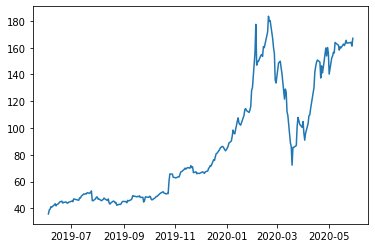

In [4]:
plt.plot(df["Date"], df["Close"])

## Qn 2: Minimum and Standard Deviation of Closing Prices
Outputs them using pandas' built-in functions and formatted in 3dp. 

In [5]:
print(f'Minimum Closing Price = {df.min()["Close"]:.3f}')
print(f'Standard Deviation of Closing Price = {df.std()["Close"]:.3f}')

Minimum Closing Price = 35.790
Standard Deviation of Closing Price = 43.886


## Qn 3: Boolean 'Signal' Column based on Previous Close
Creates a new column based on the condition if the current close is more than the previous day's close. Also counts the number of positive signals (True values). 

In [6]:
df["Signal"] = np.where( df["Close"] > df["Close"].shift(1), True, False )

In [7]:
print(f'Number of trading days with positive signals = {df["Signal"].value_counts()[True]}')

Number of trading days with positive signals = 142


## Qn 4: Boolean 'Naive' Column based on Odd/Even Days
Extracts the day of the date before converting them into integers and assigning True if odd, False if even. 

In [8]:
df["Naive"] = np.where( df["Date"].dt.strftime("%d").astype(int) % 2, True, False )

In [9]:
df

,Date,Close,Signal,Naive
0,2019-06-03 16:00:00.288,35.79,False,True
1,2019-06-04 16:00:00.288,38.72,True,False
2,2019-06-05 16:00:00.288,39.32,True,True
3,2019-06-06 16:00:00.288,41.19,True,False
4,2019-06-07 16:00:00.288,40.90,False,True
...,...,...,...,...
246,2020-05-22 16:00:00.288,163.38,False,False
247,2020-05-26 16:00:00.288,163.77,True,False
248,2020-05-27 16:00:00.288,164.05,True,True
249,2020-05-28 16:00:00.288,161.16,False,False


## Qn 5: Accuracy of the Naive Model
Creates an 'Accuracy' column to find how many predictions the Naive model makes "correctly" (same value as the Signal column) before dividing by the total number of data points. 

In [10]:
df["Accuracy"] = np.where( df["Naive"] == df["Signal"], True, False )

In [11]:
pct_accuracy = df["Accuracy"].value_counts()[True] / df.shape[0] * 100
print(f'Naive Model Accuracy = {pct_accuracy:.2f}%')

Naive Model Accuracy = 51.39%
